# Imported Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model #GARCH Models
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import math
from statistics import NormalDist
from scipy.stats import t
from datetime import datetime
from scipy.stats import shapiro #Shapiro Test
from scipy import stats #t-test
import statsmodels.api as sm #Ljung-Box Test

# Reading Base Data
**Notes**
1. Using Imported Packages, Pandas, to read csv files obtained from Yahoo Finance, Market Watch, and Investing.com
2. Time period used (01-01-2006 to 01-01-2021)
3. Raw CSV file contains non-trading days
4. Raw CSV file is arranged in ascending order by Date

In [2]:
start_date = '2006-01-01' #yyyy-mm-dd
end_date = '2022-01-01'


#Philippines
PH = pd.read_csv('https://raw.githubusercontent.com/raphaelyt/thesis199.11/main/data/2006-2021/PSEi.csv')
PH['Date'] = pd.to_datetime(PH['Date'])
PH = PH.rename(columns={'Price': 'Close'})
PH = PH.replace(',','', regex=True)
PH['Close'] = PH['Close'].astype(float, errors = 'raise')
mask = (PH['Date'] >= start_date) & (PH['Date'] <= end_date)
PH = PH.loc[mask]
PH = PH.set_index('Date')
PH = PH.sort_index(axis=0, ascending = False)

#Malaysia
MY = pd.read_csv('https://raw.githubusercontent.com/raphaelyt/thesis199.11/main/data/2006-2021/%5EKLSE.csv')
MY['Date'] = pd.to_datetime(MY['Date'])
MY = MY.rename(columns={'Price': 'Close'})
MY = MY.replace(',','', regex=True)
MY['Close'] = MY['Close'].astype(float, errors = 'raise')
mask = (MY['Date'] >= start_date) & (MY['Date'] <= end_date)
MY = MY.loc[mask]
MY = MY.set_index('Date')
MY = MY.sort_index(axis=0, ascending = False).dropna()

#Signapore
SG = pd.read_csv('https://raw.githubusercontent.com/raphaelyt/thesis199.11/main/data/2006-2021/STI.csv')
SG['Date'] = pd.to_datetime(SG['Date'])
SG = SG.replace(',','', regex=True)
SG['Close'] = SG['Close'].astype(float, errors = 'raise')
mask = (SG['Date'] >= start_date) & (SG['Date'] <= end_date)
SG = SG.loc[mask]
SG= SG.set_index('Date')
SG = SG.sort_index(axis=0, ascending = False)

#Thailand
TH = pd.read_csv('https://raw.githubusercontent.com/raphaelyt/thesis199.11/main/data/2006-2021/SETi.csv')
TH['Date'] = pd.to_datetime(TH['Date'])
TH = TH.rename(columns={'Price': 'Close'})
TH = TH.replace(',','', regex=True)
TH['Close'] = TH['Close'].astype(float, errors = 'raise')
mask = (TH['Date'] >= start_date) & (TH['Date'] <= end_date)
TH = TH.loc[mask]
TH= TH.set_index('Date')
TH = TH.sort_index(axis=0, ascending = False)

#Vietnam
VT = pd.read_csv('https://raw.githubusercontent.com/raphaelyt/thesis199.11/main/data/2006-2021/HNX.csv')
VT['Date'] = pd.to_datetime(VT['Date'])
VT = VT.rename(columns={'Price': 'Close'})
VT = VT.replace(',','', regex=True)
VT['Close'] = VT['Close'].astype(float, errors = 'raise')
mask = (VT['Date'] >= start_date) & (VT['Date'] <= end_date)
VT = VT.loc[mask]
VT= VT.set_index('Date')
VT = VT.sort_index(axis=0, ascending = False)

In [3]:
len(PH), len(MY), len(SG), len(TH), len(VT)

(3903, 4053, 4014, 3903, 3955)

## Obtaining the Log Returns

In [4]:
def get_returns(df,d):
    '''
    The function obtains the log returns of the asset shifted d days
    
    PARAMETERS
    ----------
    df : pandas.DataFrame
        The data frame contains data of a chosen stock index 
        (Stock index must be arrange in DESCENDING ORDER by DATE)
    d : int
        The dth day being forecast
        (Assumed to be 1 for most cases)
        
    RETURNS
    -------
    df : pandas.DataFrame
        The data frame returns an updated data frame containing the
        'Returns' column
    '''
    df['Previous'] = df['Close'].shift(-d)
    df['Returns'] = np.log(df['Close']/df['Previous'])*100
    display(df.head(5))
    return df

PH = get_returns(PH, 1)
MY = get_returns(MY, 1)
SG = get_returns(SG, 1)
TH = get_returns(TH, 1)
VT = get_returns(VT, 1)

,Open,High,Low,Close,Unnamed: 5,Unnamed: 6,Previous,Returns
Date,,,,,,,,
2021-12-31,7274.69,7274.69,7119.44,7122.63,NaN,NaN,7334.56,-2.932038
2021-12-29,7277.08,7334.56,7237.01,7334.56,NaN,NaN,7286.50,0.657410
2021-12-28,7239.78,7288.58,7239.78,7286.50,NaN,NaN,7254.80,0.436000
2021-12-27,7184.88,7254.80,7166.93,7254.80,NaN,NaN,7181.86,1.010492
2021-12-24,7257.72,7257.72,7181.86,7181.86,NaN,NaN,7248.05,-0.917406


,Open,High,Low,Close,Previous,Returns
Date,,,,,,
2021-12-31,1567.53,1567.53,1567.53,1567.53,1543.61,1.537730
2021-12-30,1543.61,1543.61,1543.61,1543.61,1545.04,-0.092597
2021-12-29,1545.04,1545.04,1545.04,1545.04,1539.89,0.333881
2021-12-28,1539.89,1539.89,1539.89,1539.89,1533.91,0.389095
2021-12-27,1533.91,1533.91,1533.91,1533.91,1516.45,1.144795


,Open,High,Low,Close,Previous,Returns
Date,,,,,,
2021-12-31,3127.11,3139.74,3123.68,3123.68,3126.64,-0.094715
2021-12-30,3132.36,3137.86,3126.55,3126.64,3138.02,-0.363308
2021-12-29,3135.39,3140.52,3132.87,3138.02,3128.41,0.306714
2021-12-28,3110.82,3128.92,3108.93,3128.41,3104.24,0.775597
2021-12-27,3107.63,3113.55,3104.24,3104.24,3108.28,-0.130060


,Open,High,Low,Close,Previous,Returns
Date,,,,,,
2021-12-30,1657.29,1660.85,1652.37,1657.62,1653.33,0.259140
2021-12-29,1643.43,1654.98,1641.75,1653.33,1641.52,0.716879
2021-12-28,1640.97,1650.28,1640.61,1641.52,1636.50,0.306283
2021-12-27,1641.28,1642.42,1632.79,1636.50,1637.22,-0.043987
2021-12-24,1642.64,1644.12,1635.19,1637.22,1641.47,-0.259250


,Close,Open,High,Low,Vol.,Change %,Previous,Returns
Date,,,,,,,,
2021-12-31,473.99,461.67,474.18,460.94,102.38K,2.67%,461.65,2.637920
2021-12-30,461.65,457.83,461.88,457.69,115.86K,0.83%,457.83,0.830909
2021-12-29,457.83,458.03,460.33,456.90,105.72K,-0.05%,458.05,-0.048041
2021-12-28,458.05,449.41,458.05,449.41,128.26K,1.92%,449.41,1.904274
2021-12-27,449.41,445.60,449.84,444.83,85.30K,0.85%,445.61,0.849148


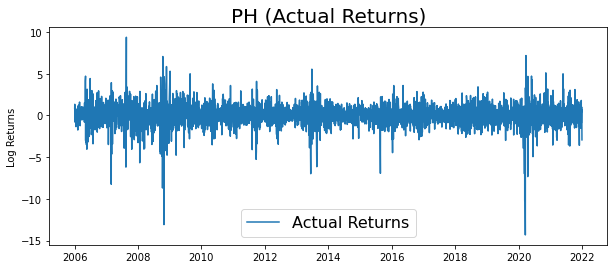

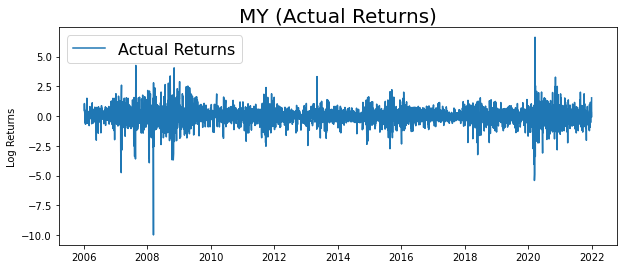

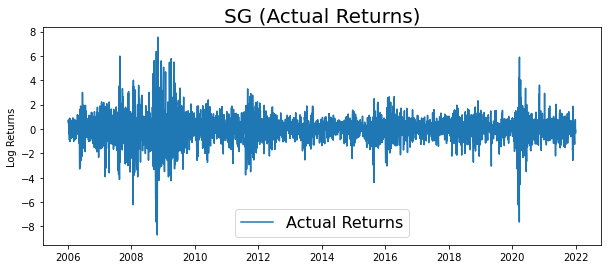

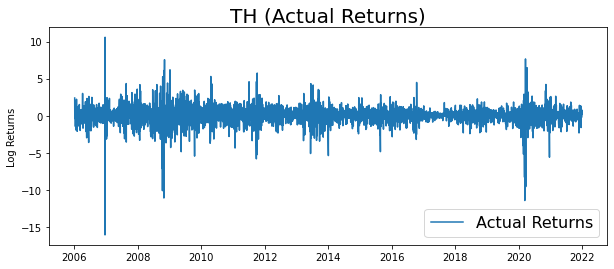

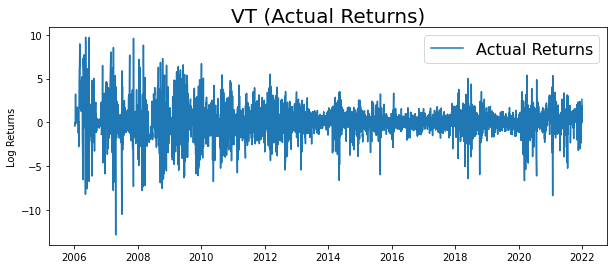

In [5]:
plt.figure(figsize=(10,4))
plt.plot(PH['Returns'])
plt.ylabel('Log Returns')
plt.title('PH (Actual Returns)', fontsize=20)
plt.legend(['Actual Returns'], fontsize=16)

plt.figure(figsize=(10,4))
plt.plot(MY['Returns'])
plt.ylabel('Log Returns')
plt.title('MY (Actual Returns)', fontsize=20)
plt.legend(['Actual Returns'], fontsize=16)

plt.figure(figsize=(10,4))
plt.plot(SG['Returns'])
plt.ylabel('Log Returns')
plt.title('SG (Actual Returns)', fontsize=20)
plt.legend(['Actual Returns'], fontsize=16)

plt.figure(figsize=(10,4))
plt.plot(TH['Returns'])
plt.ylabel('Log Returns')
plt.title('TH (Actual Returns)', fontsize=20)
plt.legend(['Actual Returns'], fontsize=16)

plt.figure(figsize=(10,4))
plt.plot(VT['Returns'])
plt.ylabel('Log Returns')
plt.title('VT (Actual Returns)', fontsize=20)
plt.legend(['Actual Returns'], fontsize=16)

# Testing the Data
### Significance in the Difference of the Means
$H_0$ : The significance in the differences of the means is equal to 0 \
$H_a$ : The significance in the differences of the means is NOT equal to 0 

Reject $H_0$ iif $p$-value is less than $\alpha$.

In [15]:
#Philippines
print(stats.ttest_1samp(PH['Returns'].dropna(), 0.0, alternative = 'two-sided'))

#Malaysia
print(stats.ttest_1samp(MY['Returns'].dropna(), 0.0, alternative = 'two-sided'))

#Singapore
print(stats.ttest_1samp(SG['Returns'].dropna(), 0.0, alternative = 'two-sided'))

#Thailand
print(stats.ttest_1samp(TH['Returns'].dropna(), 0.0, alternative = 'two-sided'))

#Vietnam
print(stats.ttest_1samp(VT['Returns'].dropna(), 0.0, alternative = 'two-sided'))

Ttest_1sampResult(statistic=1.488842092058566, pvalue=0.13660978936977358)
Ttest_1sampResult(statistic=1.1936739821661388, pvalue=0.23267543575939875)
Ttest_1sampResult(statistic=0.4402653163341311, pvalue=0.6597686755582779)
Ttest_1sampResult(statistic=1.0706859975682324, pvalue=0.28437687944229256)
Ttest_1sampResult(statistic=1.4423165748795848, pvalue=0.1492923096114734)


### Possibility of the Existance of Serial Correlations
$H_0$: There does not exist any serial correlation between the returns \
$H_a$: There exists serial correlation between the returns

Reject $H_0$ iif $p$-value is less than $\alpha$.

In [24]:
#Philippines
print(sm.stats.acorr_ljungbox(PH['Returns'].dropna(), lags=[20], return_df=True))

#Malaysia
print(sm.stats.acorr_ljungbox(MY['Returns'].dropna(), lags=[20], return_df=True))

#Singapore
print(sm.stats.acorr_ljungbox(SG['Returns'].dropna(), lags=[20], return_df=True))

#Thailand
print(sm.stats.acorr_ljungbox(TH['Returns'].dropna(), lags=[20], return_df=True))

#Vietnam
print(sm.stats.acorr_ljungbox(VT['Returns'].dropna(), lags=[20], return_df=True))

      lb_stat     lb_pvalue
20  71.714181  9.538147e-08
      lb_stat  lb_pvalue
20  63.944007   0.000002
      lb_stat  lb_pvalue
20  62.517577   0.000003
      lb_stat     lb_pvalue
20  80.886945  2.774349e-09
       lb_stat     lb_pvalue
20  210.921404  7.680360e-34


### Existence of Normality in Data
$H_0$: The data is normally distributed \
$H_a$: The data is NOT normally distributed

Reject $H_0$ iif $p$-value is less than $\alpha$.

In [25]:
#Philippines
print(shapiro(PH['Returns'].dropna()))

#Malaysia
print(shapiro(MY['Returns'].dropna()))

#Singapore
print(shapiro(SG['Returns'].dropna()))

#Thailand
print(shapiro(TH['Returns'].dropna()))

#Vietnam
print(shapiro(VT['Returns'].dropna()))

ShapiroResult(statistic=0.9153400659561157, pvalue=2.91189820886697e-42)
ShapiroResult(statistic=0.9075261950492859, pvalue=2.942726775082116e-44)
ShapiroResult(statistic=0.9146379232406616, pvalue=7.454907830208027e-43)
ShapiroResult(statistic=0.8727837204933167, pvalue=0.0)
ShapiroResult(statistic=0.9258080124855042, pvalue=1.8320295862889793e-40)


# DUMP CODE

In [ ]:
# #Imported Packages
# import pandas_datareader as web
# from datetime import datetime, timedelta


# #Start date and End date
# def start_end (date_1, date_2):
#     start = datetime.strptime(date_1,'%d/%m/%Y').date()
#     end = datetime.strptime(date_2, '%d/%m/%Y').date()
#     return start, end

# start, end = start_end ('01/01/2016', '01/01/2021')
# print(start,end)

# #Stock Returns using PANDAS DATAREADER
# def stock_returns(ticker, start, end, index = 'yahoo', d = 1):
#     stock = web.DataReader(ticker, index, start, end)
#     stock['Previous'] = stock['Close'].shift(d)
#     stock['Returns'] = np.log(stock['Close']/stock['Previous'])
#     return stock.sort_index(axis=0, ascending=False)

# PSEI_PS = stock_returns('PSEI.PS', start, end, index = 'yahoo', d = 1)
# # print(PSEI_PS)
# print(PSEI_PS)

### Testing the Kupiec Test

In [ ]:
# def binom_dist(N, alpha, ss):
#     '''
#     The function returns the test statistics of the binomial
#     distribution
    
#     PARAMETERS
#     ----------
#     N : int
#         The value is the number of VaR violations
#     alpha : float 
#         The level of significance of the VaR
#         (Assumes a value in between 0 and 1)
#     ss : int
#         The total number of entries in the data frame of the asset
        
#     RETURNS
#     -------
#     ts : float
#         The value is the test statistic of the binomial distribution
#     '''
#     return (N-alpha*ss)/np.sqrt(ss*(1-alpha)*alpha)

# binom_dist(10, 0.01, 972)


In [ ]:
# def CI_kupiec(alpha, ss):
#     '''
#     The function returns an (1-alpha)% confidence interval for N
    
#     PARAMETERS
#     ----------
#     alpha : float 
#         The level of significance of the VaR
#         (Assumes a value in between 0 and 1)
#     ss : int
#         The total number of entries in the data frame of the asset
        
#     RETURNS
#     -------
#     CI : list
#         The list is the (1-alpha)% confidence interval
#     '''
#     CI = []
#     a = np.ceil(alpha*ss - (NormalDist().inv_cdf(1-alpha/2))*np.sqrt(ss*alpha*(1-alpha)))
#     b = np.ceil(alpha*ss + (NormalDist().inv_cdf(1-alpha/2))*np.sqrt(ss*alpha*(1-alpha)))
#     CI.append(a)
#     CI.append(b)
#     return CI

# CI_kupiec(0.05,972)


## Absolute Returns

In [ ]:
# #Abolsute Returns
# prediction_size = 365

# #Philippines
# plt.figure(figsize=(10,4))
# plt.plot(abs(PH['Returns'].iloc[:-(len(PH)-prediction_size)]))
# plt.plot(PH_fw_dn)
# plt.ylabel('Log Returns')
# plt.title('PH (VaR Prediction - Fixed Forecast)', fontsize=20)
# plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

# #Malaysia
# plt.figure(figsize=(10,4))
# plt.plot(abs(MY['Returns'].iloc[:-(len(MY)-prediction_size)]))
# plt.plot(MY_fw_dn)
# plt.ylabel('Log Returns')
# plt.title('MY (VaR Prediction - Fixed Forecast)', fontsize=20)
# plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

# #Singapore
# plt.figure(figsize=(10,4))
# plt.plot(abs(SG['Returns'].iloc[:-(len(SG)-prediction_size)]))
# plt.plot(SG_fw_dn)
# plt.ylabel('Log Returns')
# plt.title('SG (VaR Prediction - Fixed Forecast)', fontsize=20)
# plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

# #Thailand
# plt.figure(figsize=(10,4))
# plt.plot(abs(TH['Returns'].iloc[:-(len(TH)-prediction_size)]))
# plt.plot(TH_fw_dn)
# plt.ylabel('Log Returns')
# plt.title('TH (VaR Prediction - Fixed Forecast)', fontsize=20)
# plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

# #Vietnam
# plt.figure(figsize=(10,4))
# plt.plot(abs(VT['Returns'].iloc[:-(len(VT)-prediction_size)]))
# plt.plot(VT_fw_dn)
# plt.ylabel('Log Returns')
# plt.title('VT (VaR Prediction - Fixed Forecast)', fontsize=20)
# plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)